# Frequency Domain
SPI2 Basics on Image processing

Ecole Centrale Nantes

Diana Mateus

Participant: (FILL IN YOUR NAME AND LASTNAME)

## 0. Preparation 

### 0.1 Import the required modules


In [1]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io as io
from skimage.transform import resize

### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook.

In [2]:
IMDIR = "./images/images/"
print(os.listdir(IMDIR))



['.DS_Store', 'Fourier', 'Frequency', 'jpeg', 'PhaseMag']


### 0.2 Read and display the images
Check that you can read and display all the provided images. Do not include this cell, the code nor its ouput in the final report

./images/images/Fourier\house.gif
house.gif
./images/images/Fourier\squares.png
squares.png
./images/images/Fourier\textures.jpg
textures.jpg
./images/images/Fourier\tiled.png
tiled.png
./images/images/Fourier\zebra-wall.png
zebra-wall.png
./images/images/Frequency\astronaut-interference.tif
astronaut-interference.tif
./images/images/Frequency\checkerboard.png
checkerboard.png
./images/images/Frequency\face1.jpg
face1.jpg
./images/images/Frequency\face2.jpg
face2.jpg
./images/images/Frequency\frequences.png
frequences.png
./images/images/Frequency\letter.png
letter.png
./images/images/Frequency\seaport.jpg
seaport.jpg
./images/images/Frequency\snow.jpg
snow.jpg
./images/images/Frequency\sunset.jpg
sunset.jpg
./images/images/Frequency\text-spotshade.tif
text-spotshade.tif
./images/images/Frequency\tower.jpg
tower.jpg
./images/images/jpeg\pink.jpg
pink.jpg
./images/images/jpeg\spring.JPG
spring.JPG
./images/images/PhaseMag\cat.jpg
cat.jpg
./images/images/PhaseMag\wolf.jpg
wolf.jpg


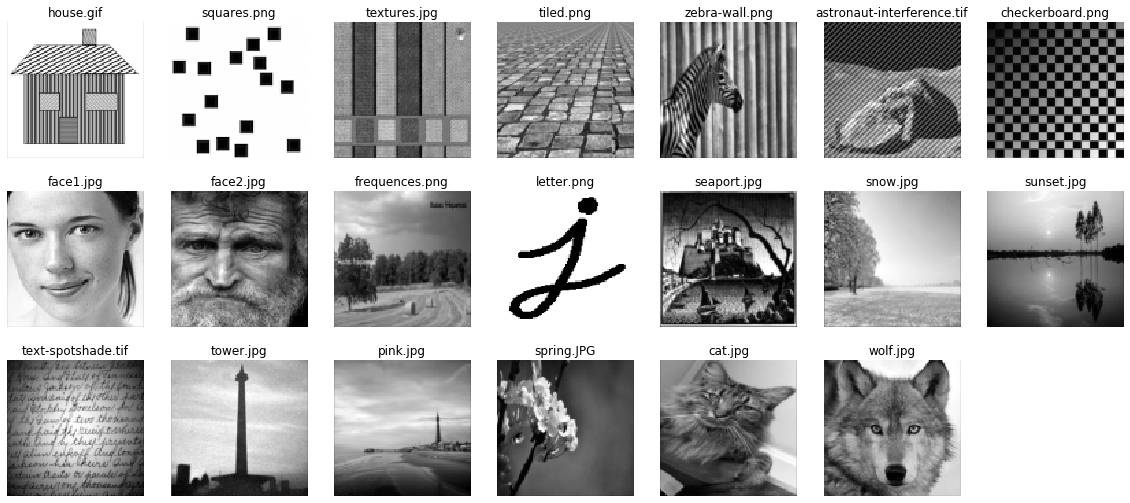

In [17]:
width=20
height=15
plt.rcParams['figure.figsize'] = [width, height]
            
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # print the paths to current filename if nothing is being found
            print(f)
            print(filename)
            
            # read the image 
            im = io.imread(f,as_gray=True)
            im = resize(im,(100,100),mode='constant')

            # display it
            plt.subplot(5,7,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 
            
        else:
            # print the paths to current filename if nothing is being found

plt.show()



## 1. The Discrete Fourier Transform




In this exercise we will compute and visualize a DFT using numpy's fft functions:
- ```np.fft.fft2```: computes the two-dimensional FFT of an image.
- ```np.fft.fftshift```: center the frecuencies in the middle of the image
- ```np.fft.ifftshift```: reverses the centering
- ```np.fft.ifft2```: inverse fourier transform
- ```np.real```: takes the real components of a complex number
- ```np.abs```: recovers the magnitude of a complex number
- ```np.angle```: recovers the phase of a complex number 
- ```np.log```: computes the logarithm

The following code uses the above functions applied to the provided images, and shows

**a)** the original image 

**b)** the magnitude of its fft (scaled logarithmically)

**c)** the magnitude of its **centered(shifted)** Discrete Fourier transform fft (scaled logarithmically)

**c)** the inverse fft of the above transformed image (all the steps shouls be reversed)

**d) For each image explain how to interpret the FFT images**


# IMAGES IN FOURIER FOLDER

./images/images/Fourier\house.gif


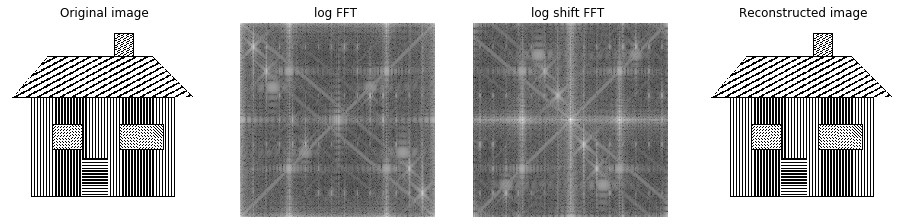

./images/images/Fourier\squares.png


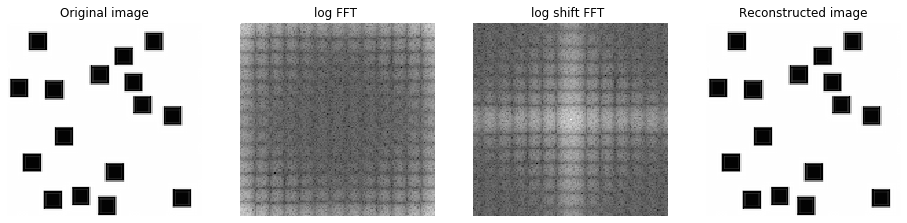

./images/images/Fourier\textures.jpg


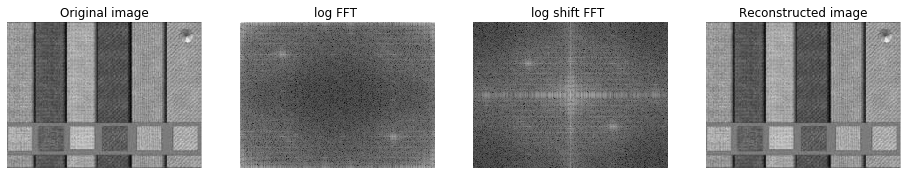

./images/images/Fourier\tiled.png


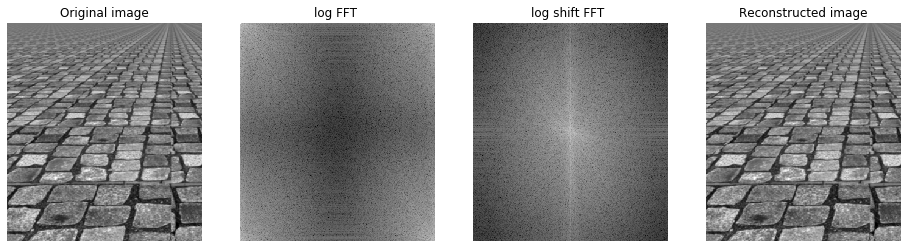

./images/images/Fourier\zebra-wall.png


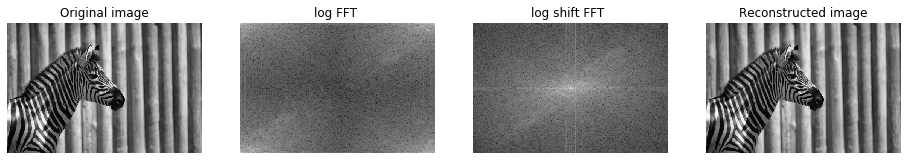

./images/images/Frequency\astronaut-interference.tif


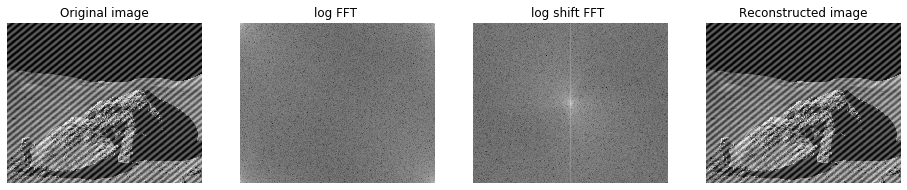

./images/images/Frequency\checkerboard.png


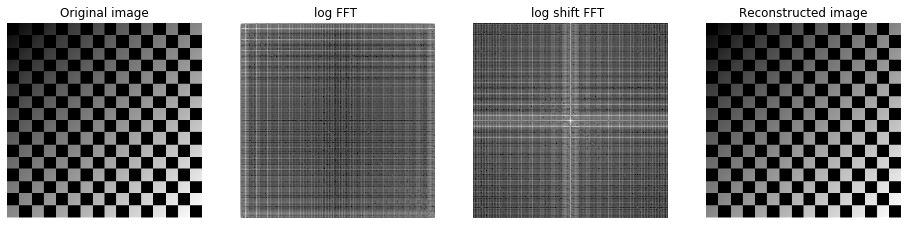

./images/images/Frequency\face1.jpg


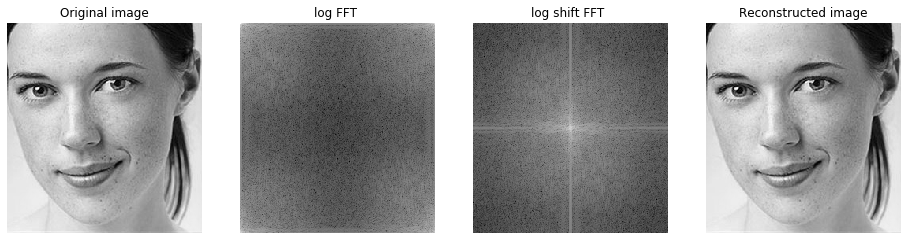

./images/images/Frequency\face2.jpg


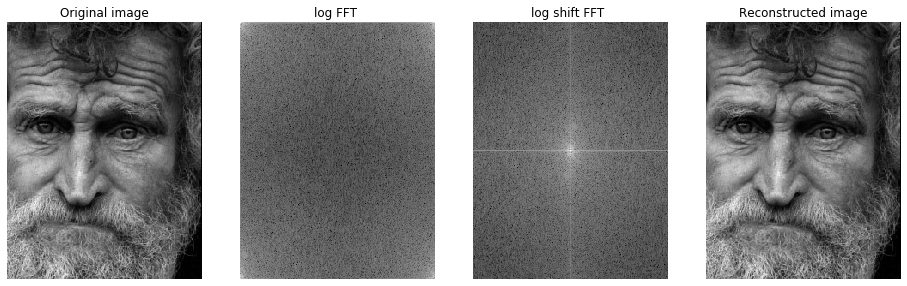

./images/images/Frequency\frequences.png


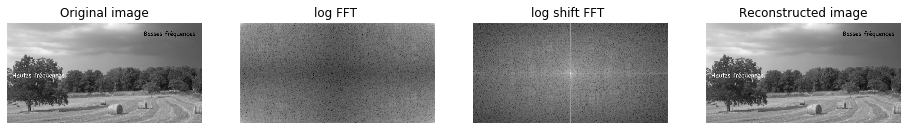

./images/images/Frequency\letter.png


D:\program\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
D:\program\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


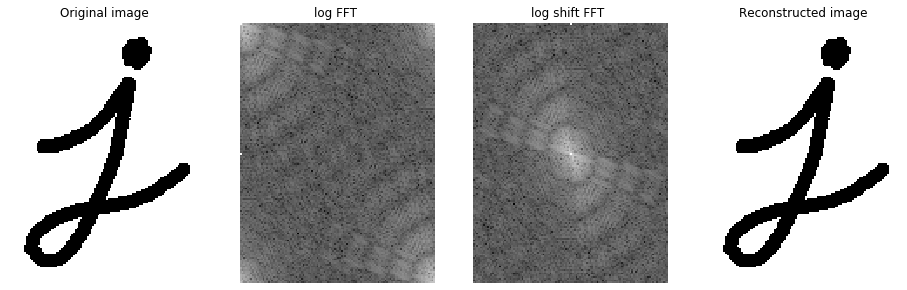

./images/images/Frequency\seaport.jpg


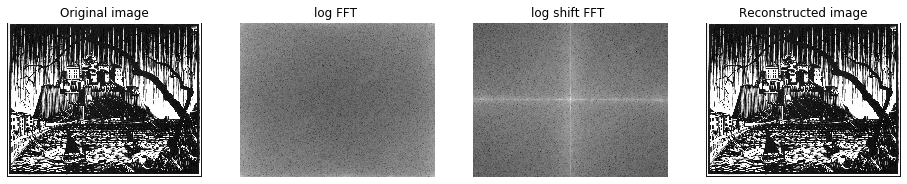

./images/images/Frequency\snow.jpg


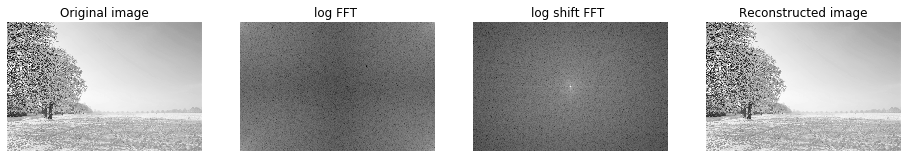

./images/images/Frequency\sunset.jpg


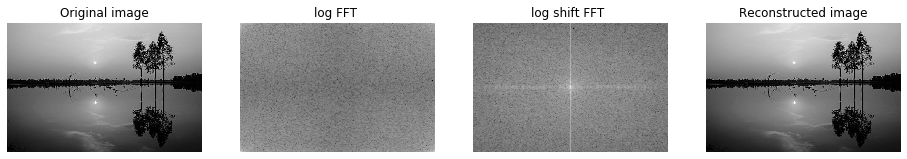

./images/images/Frequency\text-spotshade.tif


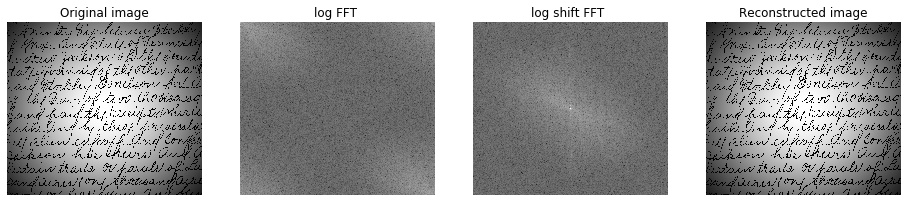

./images/images/Frequency\tower.jpg


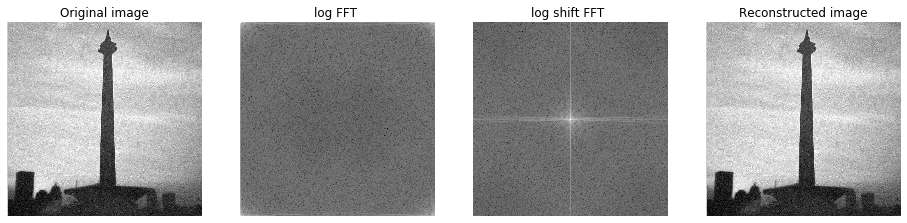

./images/images/jpeg\pink.jpg


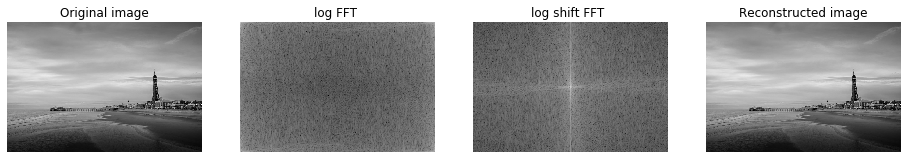

./images/images/jpeg\spring.JPG


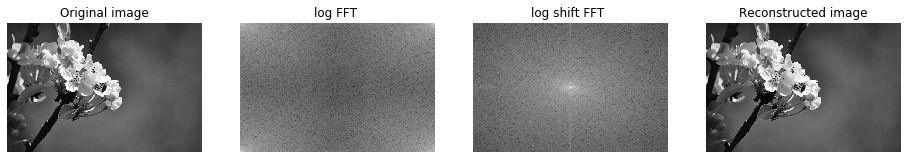

./images/images/PhaseMag\cat.jpg


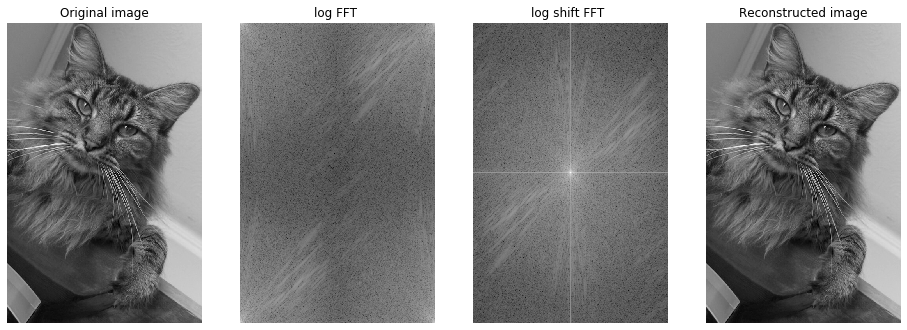

./images/images/PhaseMag\wolf.jpg


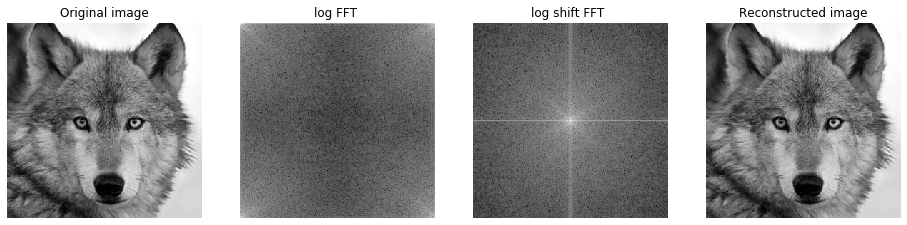

In [22]:
SUBDIR = IMDIR 


for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            im = io.imread(f,as_gray=True)
            #im = resize(im,(100,100),mode='constant') #Uncomment this line if it is too slow
    
            
            # TO EXPLAIN BY STUDENTS
            #Compute the two-dimensional fft of an image
            im_fft = np.fft.fft2(im)
            #Center the frequencies in the middle of image, that is [0,fs]->[-fs/2,fs/2]. It is eaiser for observation
            im_fft_shifted=np.fft.fftshift(im_fft)
            im_fft_shifted=im_fft_shifted[:,:]
            #Use this to reconstruct the image
            im_recon = np.real(np.fft.ifft2(np.fft.ifftshift(im_fft_shifted)))
            # END TO EXPLAIN BY STUDENTS
            
            
            fig=plt.figure(figsize=(16, 18))

            plt.subplot(141)
            plt.title('Original image')
            plt.imshow(im)
            plt.gray()
            plt.axis('off')

            
            plt.subplot(142)
            plt.title('log FFT ')
            plt.imshow(np.log(np.abs(im_fft)))
            plt.gray()
            plt.axis('off')
                        
            plt.subplot(143)
            plt.title('log shift FFT ')
            plt.imshow(np.log(np.abs(im_fft_shifted)))
            plt.gray()
            plt.axis('off')

            
            plt.subplot(144)
            plt.title('Reconstructed image')
            plt.imshow(im_recon)
            plt.gray()
            plt.axis('off')
            
            plt.show()

##  2. PROJECT JPEG

**Introduction**

The jpeg compression follows several steps

**i)** Convert images from RGB to YIQ color space

**ii)** Reduce the size (to half) of the I and Q channels

**iii)** An image is first subdivided in 8x8 subblocks (assuming the original image has sides whose length is a multiple of 8, if it is not the case just resize it).

**iv)** A frequency transformation is computed for each block (computed with a discrete cosine transform DCT II )
```
fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')
```
**v)** The DCT results are then divided by the elements of the the quantization matrices given in ```quantization_table```. The resulting values are then rounded and stored as integers. **Hint:** use the functions  ```round()```, ```astype(np.int32)```

**vi)** The result of quantization (which should have many zeros) is then compressed Run Lenght Coding and Huffman coding to reduce the size. The compressed values are saved together with the quantization table.

**vii)** The reconstruction of the image implies inverting the encoding, the quantization and the dct.



# **Instructions**

- This project is individual! This means both the code and report should be original and different for each of you. The 0 grade will apply for any attempt to break this rule.

- You are expected to return both the jupyter notebook along with a report explaining the method and the results of the jpeg compression on SEVERAL images.


- You are **ONLY** allowed to use:
    - any ``numpy`` and ``matplotlib`` functions 
    - ``io.imread`` to read the images
    - the provided functions to compute the ``dct``  
    - the provided functions to compute the quantization matrix ```quantization_table```. 
    - other functions from ``skimage`` are not needed!!! I will tolerate them only in the case you completely explain in the report (with descriptions and equations)  what this functions do.


- If you use code from an external source, this source should be cited. Failinig to do so, also leads to a grade of 0.


- The first cell of the notebook must start with the definition of the ```filename``` variable, which especifies the path of the image that will be compressed. To test your code on other images, I will only change this line. The code should run adapting to any input image.


- Implement all the jpeg compression steps (i-v) . Do **NOT** implement step vi) Run Lenght Code and Huffman coding


- Create **one function for each step**. Demonstrate the results of each step by calling each function: Show with images or graphs how the input image/list/data looks like before and after applying that function.


- Implement the inverse steps, to go from the quantized dct values to the reconstructed images. Again use one function per step, and illustrate its results


- Create a global jpegCompress function englobing steps i-v and a jpegDecompress function englobin steps in vii)


- Call the jpegCompress and jpeg Decompress function on several images: e.g. before and after applying a gaussian filter, before and after downsizing the image, on images with high or low frequency content. Compare the images (e.g. by computing their differences). Write some comments for every experiment you try. 


- Compare how the frequency representation of the original and the compressed images, look at the spectrum magnitude and phase. You may also want to compare the histogram of the frequency components.

**BONUS** Replace the given DCT function by your own basis implementation. Explain any difference.


In [3]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as skt

(427, 640, 3)
0.0 1.0
(128, 128, 3)
5.922960632663139 238.8052293388542


(-0.5, 127.5, 127.5, -0.5)

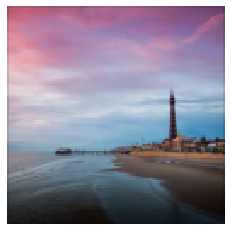

In [4]:
filename = "images/images/jpeg/pink.jpg"
im = io.imread(filename)
im = (im/255).astype(float) #To be sure is always between 0 and 1 after this cell


print(im.shape)
print(im.min(),im.max())


#Resize small first to debug
h = 128
w = 128

#The original function isn't defined, so I import the skimage.transform to resize the original picture
#If I use np.resize(im,(h,2)), the output will be one-dimensional, which is not the desired output
im = skt.resize(im,(h,w),mode='constant')*255 #This function will put the intensitites between 0 and 1 -> multiply by 255 when needed

print(im.shape)
print(im.min(),im.max())
plt.imshow(np.uint8(im))
plt.axis('off')

In [5]:
#ATTENTION The quatization table assumes the original image intensities before the dct are between 0 and 255


from scipy import fftpack

def dct_2d(im):
    return fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')

def idct_2d(im):
    return fftpack.idct(fftpack.idct(im.T, norm='ortho').T, norm='ortho')

def quantization_table(component='lum'):
    # Quantization Table for: Photoshop 
    # (http://www.impulseadventure.com/photo/jpeg-quantization.html)
    if component == 'lum':
        q = np.array([[2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 4, 5, 7, 9],
                      [2, 2, 2, 4, 5, 7, 9, 12],
                      [3, 3, 4, 5, 8, 10, 12, 12],
                      [4, 4, 5, 7, 10, 12, 12, 12],
                      [5, 5, 7, 9, 12, 12, 12, 12],
                      [6, 6, 9, 12, 12, 12, 12, 12]])
    elif component == 'chrom':
        q = np.array([[3, 3, 5, 9, 13, 15, 15, 15],
                      [3, 4, 6, 11, 14, 12, 12, 12],
                      [5, 6, 9, 14, 12, 12, 12, 12],
                      [9, 11, 14, 12, 12, 12, 12, 12],
                      [13, 14, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12]])
    else:
        raise ValueError((
            "component should be either 'lum' or 'chrom', "
            "but '{comp}' was found").format(comp=component))

    return q



In [6]:
def RGB2YIQ(im):
    trans = np.array([[0.257, 0.564, 0.098],
                   [-0.148, -0.291, 0.439],
                   [0.439, -0.368, -0.071]])
    shift = np.array([16, 128, 128])
    im2 = np.zeros(shape = im.shape)
    for i in range(w):
        for j in range(h):
            im2[i, j, :] = np.dot(trans, im[i, j, :]) + shift
            
    return im2


In [7]:
def reduceIQ(im):
    im3=np.zeros(shape=im.shape)
    for i in range(w):
        for j in range(h):
            if(i%2==0 or j%2==0):
                im3[i, j, 1] = 0
                im3[i, j, 2] = 0
                
    for i in range(w):
        for j in range(h):
            im3[i, j, 0] = im[i, j, 0]
            im3[i, j, 1] = im[i, j, 1]
            im3[i, j, 2] = im[i, j ,2]
            
    return im3
            

In [8]:
def subdivided8x8(im):
    a = np.zeros((8, 8, 3))
    b = np.zeros([int((w/8)*(h/8)), 8, 8, 3])
    k = 0
    for i in range(int(w/8)):
        for j in range(int(h/8)):
            a = im[i*8:(i+1)*8, j*8:(j+1)*8, :]
            b[k] = a
            k=k+1
    return b


In [9]:
def FT4block(im):
    b = subdivided8x8(im)
    l = b.shape[0]
    c = np.zeros((8, 8, 3))
    d = np.zeros((l, 8, 8, 3))
    k=0
    for i in range(l):
        c = dct_2d(b[i]-128)
        #c = my_dct_2d(b[i]-128)
        d[k] = c
        k = k+1
    return d

In [10]:
def quantize(dct):
    l = dct.shape[0]
    a = np.zeros((8, 8, 3))
    b = np.zeros((8, 8, 3))
    q = np.zeros((l, 8, 8, 3))
    k = 0
    for i in range(l):
        b = dct[i]
        a[:, :, 0] = b[:, :, 0]/quantization_table(component = 'lum')
        a[:, :, 1] = b[:, :, 1]/quantization_table(component = 'chrom')
        a[:, :, 2] = b[:, :, 2]/quantization_table(component = 'chrom')
        q[k] = a.astype(np.int32)
        k = k+1
    return q

In [11]:
#start doing reconstruction
def i_quantize(out):
    l = out.shape[0]
    a = np.zeros((8, 8, 3))
    b = np.zeros((8, 8, 3))
    q = np.zeros((l, 8, 8, 3))
    k = 0
    for i in range(l):
        b = out[i]
        a[:, :, 0] = b[:, :, 0]*quantization_table(component = 'lum')
        a[:, :, 1] = b[:, :, 1]*quantization_table(component = 'chrom')
        a[:, :, 2] = b[:, :, 2]*quantization_table(component = 'chrom')
        q[k] = a.astype(np.int32)
        k = k+1
    return q

In [12]:
def i_FT4block(out1):
    l = out1.shape[0]
    c = np.zeros((8, 8, 3))
    d = np.zeros((l, 8, 8, 3))
    k=0
    for i in range(l):
        c = idct_2d(out1[i])+128
        d[k] = c
        k=k+1
    return d    

In [13]:
def i_subdivided8x8(out2):
    out3 = np.zeros((w, h, 3))
    a = np.zeros((8, 8, 3))
    k = 0
    for i in range(int(w/8)):
        for j in range(int(h/8)):
            a = out2[k]
            out3[i*8:(i+1)*8, j*8:(j+1)*8, :] = a
            k=k+1
    return out3

In [14]:
def YIQ2RGB(out4):
    out4 = out4.astype(np.float32)
    trans = np.array([[0.257, 0.564, 0.098],
                    [-0.148, -0.291, 0.439],
                    [0.439, -0.368, -0.071]])
    shift = np.array([16, 128, 128])
    trans_inv = np.linalg.inv(trans)
    out5 = np.zeros(shape = out4.shape)
    for i in range(w):
        for j in range(h):
            #out5[i, j, :] = np.dot(out4[i, j, :], trans_inv,) - np.dot(shift, trans_inv)
            out5[i, j, :] = np.dot(trans_inv, out4[i, j, :]) - np.dot(trans_inv, shift)
    return out5

In [15]:
def my_dct_2d(im):
    A = np.zeros((8,8))
    shape = im.shape[1]
    for i in range(8):
        for j in range(8):
            if(i == 0):
                x = np.sqrt(1/shape)
            else:
                x = np.sqrt(2/shape)
            A[i, j] = x*np.cos(np.pi*(j + 0.5)*i/shape)
    A_T = A.transpose()
    out = np.zeros((8,8,3))
    for i in range(3):
        Y1 = np.dot(A,im[:,:,i])
        out[:,:,i] = np.dot(Y1,A_T)
    return out

In [16]:
def jpegCompress(im):
    out1 = RGB2YIQ(np.uint8(im))
    out2 = reduceIQ(np.uint8(out1))
    out3 = FT4block(np.uint8(out2))
    out4 = quantize(out3).astype(np.int32)
    return out4 #quantilized image

In [17]:
def jpegDecompress(quantized_data):
    out1 = i_quantize(quantized_data);
    out2 = i_FT4block(out1)
    out3 = i_subdivided8x8(out2)
    out4 = YIQ2RGB(out3).astype(np.int32)
    return out4 #decompressed image

(-0.5, 127.5, 127.5, -0.5)

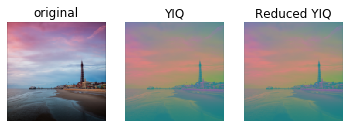

In [18]:
plt.subplot(1, 3, 1)
plt.title('original')
plt.imshow(np.uint8(im))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('YIQ')
plt.imshow(np.uint8(RGB2YIQ(im)))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Reduced YIQ')
plt.imshow(np.uint8(reduceIQ(RGB2YIQ(im))))
plt.axis('off')


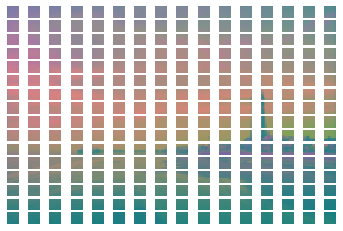

In [19]:
b = subdivided8x8(np.uint8(reduceIQ(RGB2YIQ(im))))
j = 1
for i in range(256):
    plt.subplot(16, 16, j)
    plt.imshow((b[i]).astype(int))
    plt.axis('off')
    j = j+1


(-0.5, 127.5, 127.5, -0.5)

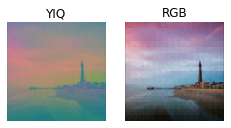

In [24]:
dct = FT4block(np.uint8(reduceIQ(RGB2YIQ(im))))
out = quantize(dct).astype(np.int32)
out1 = i_quantize(out).astype(np.int32)
out2 = i_FT4block(out1)
out3 = i_subdivided8x8(out2) 
out4 = YIQ2RGB(out3)
#print(b[1,:,:,1])
#print(dct[1,:,:,1])
#print(out[1,:,:,1])
#print(out1[1,:,:,1])
#print(out2[1,:,:,1])

plt.subplot(1, 3, 1)
plt.title('YIQ')
plt.imshow(out3.astype(np.int32))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('RGB')
plt.imshow(out4.astype(np.int32))
plt.axis('off')




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

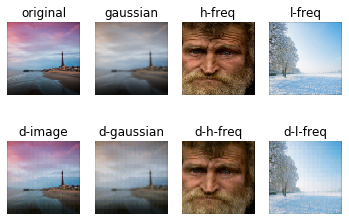

In [21]:
h = 128
w = 128
filename = "images/images/jpeg/pink.jpg"
im = io.imread(filename)
im = np.uint8(skt.resize(im,(h,w),mode='constant')*255)

#original image
plt.subplot(2,4,1)
plt.title('original')
plt.imshow(im)
plt.axis('off')

quantized_data = jpegCompress(im)
out1 = jpegDecompress(quantized_data)

#decompressed original image
plt.subplot(2,4,5)
plt.title('d-image')
plt.imshow(out1)
plt.axis('off')

#original gaussian image
from scipy.ndimage import gaussian_filter
gaussian = gaussian_filter(im,sigma = 1)

plt.subplot(2,4,2)
plt.title('gaussian')
plt.imshow(gaussian)
plt.axis('off')

#decompressed gaussian
quantized_gaussian = jpegCompress(gaussian)
out2 = jpegDecompress(quantized_gaussian)

plt.subplot(2,4,6)
plt.title('d-gaussian')
plt.imshow(out2)
plt.axis('off')

#image with high frequencies
h = 128
w = 128
filename1 = "images/images/Frequency/face2.jpg"
im1 = io.imread(filename1)
im1 = np.uint8(skt.resize(im1,(h,w),mode='constant')*255)

plt.subplot(2,4,3)
plt.title('h-freq')
plt.imshow(im1)
plt.axis('off')

quantized_hfreq = jpegCompress(im1)
out3 = jpegDecompress(quantized_hfreq)

#decompressed high-frequency image
plt.subplot(2,4,7)
plt.title('d-h-freq')
plt.imshow(out3)
plt.axis('off')

#image with low frequencies
h = 128
w = 128
filename2 = "images/images/Frequency/snow.jpg"
im2 = io.imread(filename2)
im2 = np.uint8(skt.resize(im2,(h,w),mode='constant')*255)

plt.subplot(2,4,4)
plt.title('l-freq')
plt.imshow(im2)
plt.axis('off')

quantized_lfreq = jpegCompress(im2)
out4 = jpegDecompress(quantized_lfreq)

#decompressed low-frequency image
plt.subplot(2,4,8)
plt.title('d-l-freq')
plt.imshow(out4)
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

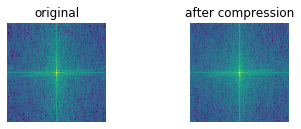

In [22]:
#transform images to gray scale
im3 = 0.299*im[:,:,0]+0.587*im[:,:,1]+0.114*im[:,:,2]
im_fft = np.fft.fft2(im3)
im_fft_shifted=np.fft.fftshift(im_fft)

im4 = 0.299*out1[:,:,0]+0.587*out1[:,:,1]+0.114*out1[:,:,2]
i_im_fft = np.fft.fft2(im4)
i_im_fft_shifted=np.fft.fftshift(i_im_fft)

plt.subplot(2,2,1)
plt.imshow(np.log(np.abs(im_fft_shifted)))
plt.title('original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(np.log(np.abs(i_im_fft_shifted)))
plt.title('after compression')
plt.axis('off')